## Assignment 1b: Functions and Computation
Hunter Welch 2/2/2023

### 1. Markdown and LaTeX

#### 1a. Sinewave

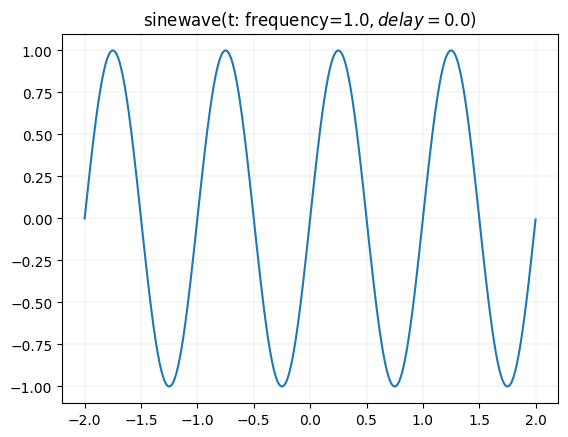

1.0


In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

def sinewave(t, f = 1.0, d = 0.0):
    return np.sin(2 * math.pi * f * (t + d))


def plot_sinewave(t, f = 1.0, d = 0.0):
    y = sinewave(t, f, d)
    plt.plot(t, y)

    plt.title(f'sinewave(t: frequency=${f}, delay=${d})')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    # plt.legend()
    plt.show()


t = np.arange(-2, 2, 0.001)
plot_sinewave(t)

print(sinewave(0.0, f=5, d=0.05))


##### 1) a time in seconds to a sample index, using $f_s$ as the sampling frequency and $i$ as the sample index (zero-based)

For this equation we know that the sampling frequency times time is equal to the index. Converting this to its unit value we see that this works because:

\begin{equation}
  f_s * t = i
\end{equation}

\begin{equation}
  \frac{sample}{sec} * sec = sample
\end{equation}

\begin{equation}
  sample = sample
\end{equation}

Therefore we know that this works because index = sample.

##### 2) the delay in seconds to phase in radians.

\begin{equation}
  \phi = sec * \frac{cycles}{sec} * \frac{radians}{cycles}
\end{equation}

This is equivalent to:

\begin{equation}
  \phi = -d * f * 2\pi
\end{equation}

Here the seconds is negative because it is a delay.
And so if we substitute this into the sin equation:

$$
\sin(2\pi f t + \phi)
$$

$$
\sin(2\pi f t + 2df\pi)
$$

And we can factor out the 2f$\pi$ to get

$$
\sin(2\pi f (t + d))
$$

#### 1b. Gabor

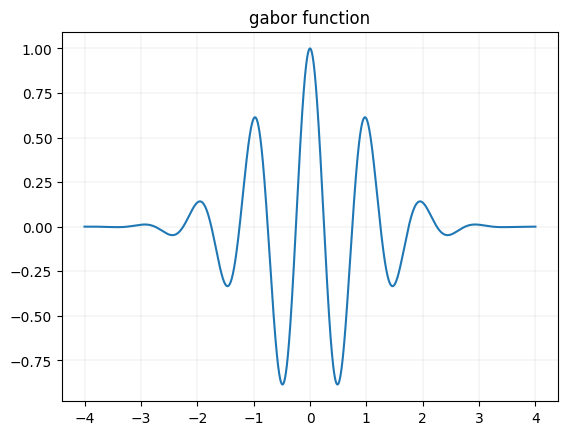

#4 0.8611504148937256
#5 9.413962637767014
#6 -8.559246702653548


In [10]:
import matplotlib.pyplot as plt
import numpy as np

def gabor(t, a = 1, f = 1, sigma = 1, phi = 0):
    vector = np.vectorize(np.float_)
    t = vector(t)
    return a * np.exp(- (t ** 2) / (2 * sigma ** 2)) * np.cos(2 * np.pi * f * t + phi)

def plot_gabor(t, a = 1, f = 1, sigma = 1, phase = 0, type="gabor"):
    if type == "gabor":
        y = gabor(t, a, f, sigma, phase)
    elif type == "gabore" or type == "even":
        y = gabore(t, a, f, sigma)
    else:
        y = gaboro(t, a, f, sigma)
    plt.plot(t, y)
    plt.title(f'gabor function')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    # plt.legend()
    plt.show()

def gabore(t, a = 1, f = 1, sigma = 1):
    phi = 0
    return gabor(t, a, f, sigma, phi)

def gaboro(t, a = 1, f = 1, sigma = 1):
    phi = np.pi / 2
    return gabor(t, a, f, sigma, phi)

def gabor_norm(f = 1, sigma = 1, phi = 0, fs = 100):

    t = np.arange(-8*sigma, 8*sigma, 1/fs)
    a = 1
    gab = gabor(t, a, f, sigma, phi)
    return np.linalg.norm(gab)

def gabore_norm(f = 1, sigma = 1, fs = 100):
    phi = 0
    return gabor_norm(f, sigma, phi, fs)

def gaboro_norm(f = 1, sigma = 1, fs = 100):
    phi = np.pi / 2
    return gabor_norm(f, sigma, phi, fs)


t = np.arange(-4, 4, 0.001)
plot_gabor(t)

print('#4', gaboro(-3, f=0.0625, sigma=8))
print('#5', gabor_norm(f=100, sigma=0.01, fs=10000))
a = gaboro_norm(f=100, sigma = 0.01, fs = 10000)
print('#6', gaboro(0.003, a=a, f=100, sigma=0.01))

#### 1c. Gammatone

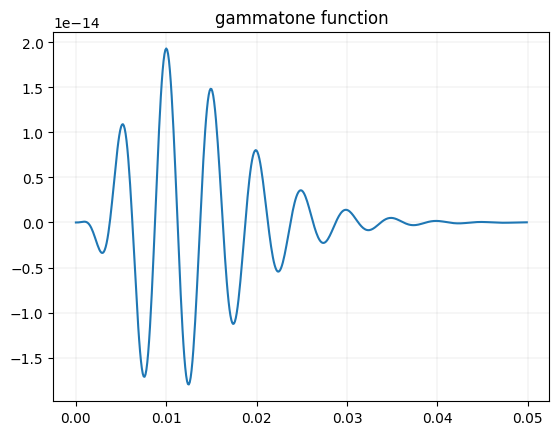

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def erb(f):
    return 24.7 * ((4.37 * f) / 1000 + 1)

def get_b(f):
    return (1.019 * erb(f))

def gammatone_norm(t, n = 4, f = 200, phi = 0):
    b = get_b(f)
    gamma = t ** (n - 1) * np.exp(-2 * np.pi * b * t) * np.cos(2 * np.pi * f * t + phi)
    return np.linalg.norm(gamma)

def gammatone(t, n = 4, f = 200, phi = 0):
    b = get_b(f)
    a = gammatone_norm(t, n, f, phi)

    return a * (t ** (n - 1)) * np.exp(-2 * np.pi * b * t) * np.cos(2 * np.pi * f * t + phi)


def plot_gammatone(t, n = 4, f = 200, phi = 0):
    y = gammatone(t, n, f, phi)
    plt.plot(t, y)

    plt.title(f'gammatone function')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    # plt.legend()
    plt.show()


t = np.arange(0, 0.05, 0.0001)
plot_gammatone(t)


### 2. Simple Computation

#### 2a. Local Maxima

In [12]:
def localmaxima(arr):
    local_maxes = []
    i = 1
    while i < len(arr) - 1:
        if arr[i - 1] < arr[i] and arr[i + 1] < arr[i]:
            local_maxes.append(i)
        i += 1
    return local_maxes

test_arr = [1, 2, 3, 4, 1, 2, 3, -1, -5, -7, 0, -1]
print(localmaxima(test_arr))

t2 = [1, 3, 2, -2, 2, 4, 8, 6]
print(localmaxima(t2))

[3, 6, 10]
[1, 6]


#### 2b. Crossings

In [15]:

# a function to compute the indicies of where a function first equals or crosses a specific threshold
def crossings(arr, threshold, direction = 'both'):
    crosses = []
    i = 1
    while i < len(arr):
        if arr[i] == threshold and arr[i - 1] != threshold:
            crosses.append(i)
        elif arr[i] > threshold and arr[i - 1] < threshold and (direction == 'both' or direction == 'negpos'):
            crosses.append(i)
        elif arr[i] < threshold and arr[i - 1] > threshold and (direction == 'both' or direction == 'posneg'):
            crosses.append(i)
        i += 1
    return crosses



test_arr = [1, 2, 3, 4, 1, 2, 3, -1, -5, -7, 0, -1, 1]
exp = [4, 7, 12]
print(crossings(test_arr, 1))


crossings([-1, 0, 1, 2, 0, -2], threshold=1, direction="both")

[4, 7, 12]


[2, 4]

#### 2c. Envelope

In [18]:
# function to downsample data and get the lower, upper, and block indicies of each

def envelope(y, nblocks = 10):
    ylower = []
    yupper = []
    blockindices = []

    size_block = int(len(y) / nblocks)

    remainders = len(y) % nblocks
    # if we have remainders the first few blocks need to take an extra element
    if remainders > 0:
        size_block += 1

    index = 0
    iteration_num = 0
    while index < len(y):
        # here we are setting the size of the block back to the original number after we have gotten through the correct number of blocks that need an extra element
        if iteration_num == remainders and remainders != 0:
            size_block -= 1
        else: size_block 
        if index + size_block < len(y):
            upper = index + size_block
        else:
            upper = len(y)
        arr = y[index: upper]
        ylower.append(min(arr))
        yupper.append(max(arr))
        blockindices.append(index)
        index = upper
        iteration_num += 1
    return ylower, yupper, blockindices

test_arr = [1, 2, 3, 4, 1, 2, 3, -1, -5, -7, 0, -1, 1, ]
yl, yu, bi = envelope(test_arr)
print("ylower: ", yl)
print("yupper: ", yu)
print("blockindicies: ", bi)


y = [5, 5, 2, 3, 4, 3, -6, -9, 0, -3, 9, -7]
ylower, yupper, blockindices = envelope(y, nblocks=3)
print(blockindices)

ylower:  [1, 3, 1, 3, -1, -5, -7, 0, -1, 1]
yupper:  [2, 4, 2, 3, -1, -5, -7, 0, -1, 1]
blockindicies:  [0, 2, 4, 6, 7, 8, 9, 10, 11, 12]
[0, 4, 8]


### 3. Extra plots from check

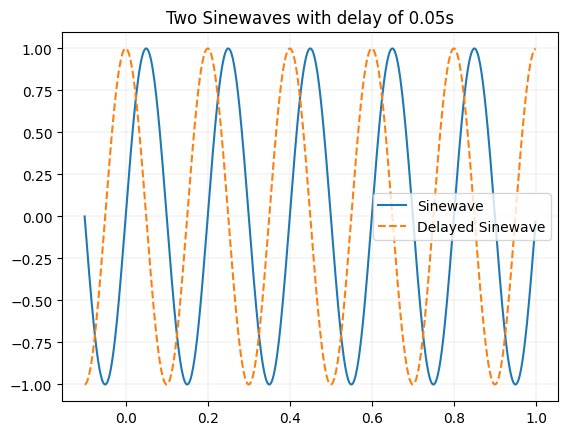

In [3]:
# q11
import math
import matplotlib.pyplot as plt
import numpy as np

def sinewave(t, f = 1.0, d = 0.0):
    return np.sin(2 * math.pi * f * (t + d))


def plot_sinewave(t, f = 1.0, d = 0.0):
    y = sinewave(t, f, d)
    plt.plot(t, y)

    plt.title(f'sinewave(t: frequency=${f}, delay=${d})')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    # plt.legend()
    plt.show()


def plot_twowaves():
    t = np.arange(-0.1, 1.0, 0.001)
    f = 5
    delay = 0.05

    y_solid = sinewave(t, f)
    y_dashed = sinewave(t, f, delay)

    plt.plot(t, y_solid, "-", label="Sinewave")
    plt.plot(t, y_dashed, "--", label="Delayed Sinewave")
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    plt.title(f'Two Sinewaves with delay of 0.05s')
    plt.legend()
    plt.show()

plot_twowaves()

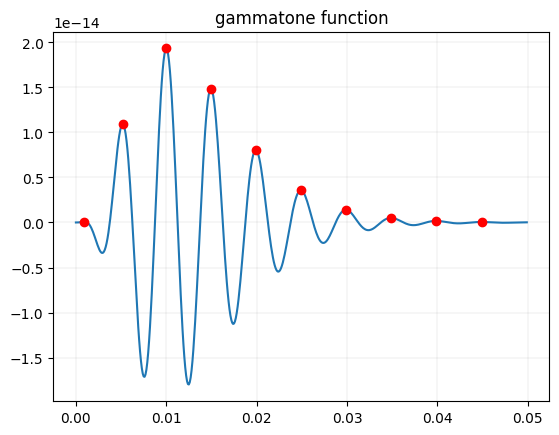

In [35]:
import matplotlib.pyplot as plt
import numpy as np


def localmaxima(arr):
    local_maxes = []
    i = 1
    while i < len(arr) - 1:
        if arr[i - 1] < arr[i] and arr[i + 1] < arr[i]:
            local_maxes.append(i)
        i += 1
    return local_maxes


def erb(f):
    return 24.7 * ((4.37 * f) / 1000 + 1)

def get_b(f):
    return (1.019 * erb(f))

def gammatone_norm(t, n = 4, f = 200, phi = 0):
    b = get_b(f)
    gamma = t ** (n - 1) * np.exp(-2 * np.pi * b * t) * np.cos(2 * np.pi * f * t + phi)
    return np.linalg.norm(gamma)

def gammatone(t, n = 4, f = 200, phi = 0):
    b = get_b(f)
    a = gammatone_norm(t, n, f, phi)

    return a * (t ** (n - 1)) * np.exp(-2 * np.pi * b * t) * np.cos(2 * np.pi * f * t + phi)


def plot_gammatone(t, n = 4, f = 200, phi = 0):
    y = gammatone(t, n, f, phi)
    plt.plot(t, y)
    
    maxes = localmaxima(y)
    for i in maxes:
        plt.plot(t[i], y[i], 'ro', label="local maxima")
    
    plt.title(f'gammatone function')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    plt.show()


t = np.arange(0, 0.05, 0.0001)
plot_gammatone(t)


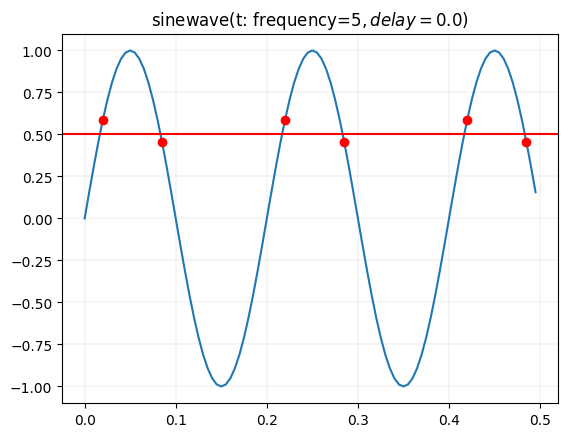

In [43]:
# q17

import math
import matplotlib.pyplot as plt
import numpy as np

# a function to compute the indicies of where a function first equals or crosses a specific threshold
def crossings(arr, threshold, direction = 'both'):
    crosses = []
    i = 1
    while i < len(arr):
        if arr[i] == threshold and arr[i - 1] != threshold:
            crosses.append(i)
        elif arr[i] > threshold and arr[i - 1] < threshold and (direction == 'both' or direction == 'negpos'):
            crosses.append(i)
        elif arr[i] < threshold and arr[i - 1] > threshold and (direction == 'both' or direction == 'posneg'):
            crosses.append(i)
        i += 1
    return crosses


def sinewave(t, f = 1.0, d = 0.0):
    return np.sin(2 * math.pi * f * (t - d))


def plot_sinewave(t, f = 1.0, d = 0.0):
    y = sinewave(t, f, d)
    plt.plot(t, y)
    plt.axhline(y = 0.5, color = 'r', linestyle = '-', label="threshold")
    plt.title(f'sinewave(t: frequency=${f}, delay=${d})')
    plt.grid(color='gray', linestyle='-', linewidth=0.1)
    c = crossings(y, 0.5)
    for i in c:
        plt.plot(t[i], y[i], 'ro', label="local maxima")
    # plt.legend()
    plt.show()


t = np.arange(0, 0.5, 1/200)
plot_sinewave(t, f=5)

